# LSTM
### Raw data (Non time-series)
Only pi data (analysis part)
Location: A

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

C:\Users\ay0un\anaconda3\envs\tf2.0\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\ay0un\anaconda3\envs\tf2.0\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\ay0un\anaconda3\envs\tf2.0\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\ay0un\anaconda3\envs\tf2.0\lib\site-packages\tensorflow\python\f

In [2]:
from tensorflow.keras.layers import Input, Dense, Activation,Dropout
from tensorflow.keras.models import Model
from tensorflow.keras import preprocessing

In [3]:
import pandas as pd
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM


In [4]:
# Data preparation
data = pd.read_csv(r'C:\Users\ay0un\Desktop\Buenos_Aires\1h_allData.csv')
data = data.rename(columns={'loc':'location'})

In [5]:
data.isnull().sum(axis = 0)

time                0
date                0
weekday             0
hour                0
location            0
temp_pi             0
temp_sbs          168
temp_blue         523
hum_pi              0
hum_sbs           168
hum_blue          523
PM1_pi              0
PM2.5_pi            0
PM10_pi             0
PM2.5_sbs         206
PM10_sbs          169
precip            523
wind              168
wind_speed        523
wind_direction    523
cloud_cover       523
pressure          168
AQI               168
sunrise             0
noon                0
sunset              0
daylight            0
dtype: int64

In [6]:
col_use = ['time', 'hour', 'location', 'temp_pi', 
       'hum_pi', 'PM1_pi', 'PM2.5_pi',
       'PM10_pi']
data = data[col_use]
data.dropna(inplace=True)
data.reset_index(drop=True, inplace=True)

In [7]:
data.head(10)

,time,hour,location,temp_pi,hum_pi,PM1_pi,PM2.5_pi,PM10_pi
0,2021-03-18 17:00:00+01:00,17,A,25.128571,36.428571,4.015714,9.323571,14.962143
1,2021-03-18 18:00:00+01:00,18,A,24.350000,34.175000,2.905000,8.352500,14.282500
2,2021-03-18 19:00:00+01:00,19,A,6.480000,49.986667,5.054000,11.749333,18.859333
3,2021-03-18 20:00:00+01:00,20,A,3.066667,61.100000,7.343333,17.540833,28.408333
4,2021-03-18 21:00:00+01:00,21,A,2.458333,66.141667,6.643333,14.654167,23.088333
5,2021-03-18 22:00:00+01:00,22,A,2.200000,67.791667,7.280000,14.491667,21.935833
6,2021-03-18 23:00:00+01:00,23,A,2.075000,69.941667,6.376667,11.823333,17.340833
7,2021-03-19 00:00:00+01:00,0,A,2.050000,71.791667,8.087500,16.170000,24.518333
8,2021-03-19 01:00:00+01:00,1,A,1.983333,69.816667,6.544167,13.952500,21.710833
9,2021-03-19 02:00:00+01:00,2,A,1.758333,69.583333,5.843333,10.430833,15.020833


In [17]:
data.columns

Index(['time', 'hour', 'location', 'temp_pi', 'hum_pi', 'PM1_pi', 'PM2.5_pi',
       'PM10_pi'],
      dtype='object')

In [18]:
data.shape

(543, 8)

data['time'] = pd.to_datetime(data['time'], utc=True)

hours = data['time'].dt.hour

data['hour'] = hours

In [19]:
# loc A
data = data[data.location != 'B']
data.tail()

,time,hour,location,temp_pi,hum_pi,PM1_pi,PM2.5_pi,PM10_pi
538,2021-04-12 09:00:00+02:00,9,A,4.816667,78.983333,2.143333,4.403333,6.750833
539,2021-04-12 10:00:00+02:00,10,A,5.350000,77.241667,3.190000,6.740000,10.450833
540,2021-04-12 11:00:00+02:00,11,A,5.975000,75.625000,1.982500,3.617500,5.262500
541,2021-04-12 12:00:00+02:00,12,A,6.372727,72.300000,3.828182,8.692727,13.842727
542,2021-04-12 13:00:00+02:00,13,A,6.641667,71.333333,4.800000,9.065833,13.411667


In [20]:
# designate columns
x_pi = ['hour', 'temp_pi', 'hum_pi', 'PM1_pi']
x_ext = ['hour', 'temp_blue', 'hum_blue']

In [21]:
y_pi = ['PM2.5_pi', 'PM10_pi']
y_ext = ['PM2.5', 'PM10']

In [22]:
df = data[x_pi+y_pi]
print(df.head())
print(df.shape)

   hour    temp_pi     hum_pi    PM1_pi   PM2.5_pi    PM10_pi
0    17  25.128571  36.428571  4.015714   9.323571  14.962143
1    18  24.350000  34.175000  2.905000   8.352500  14.282500
2    19   6.480000  49.986667  5.054000  11.749333  18.859333
3    20   3.066667  61.100000  7.343333  17.540833  28.408333
4    21   2.458333  66.141667  6.643333  14.654167  23.088333
(543, 6)


In [23]:
df_ext = data[x_ext + y_ext] 
df_ext

KeyError: "['hum_blue', 'temp_blue', 'PM10', 'PM2.5'] not in index"

## Pi data
### PM2.5

In [24]:
# Split train & test
n = len(df)
train_df = df[0:int(n*0.8)]
#val_df = df[int(n*0.7):int(n*0.8)]
test_df = df[int(n*0.8):]

In [25]:
labels = ['PM2.5_pi', 'PM10_pi']

In [26]:
X_train = train_df
X_train.head()

,hour,temp_pi,hum_pi,PM1_pi,PM2.5_pi,PM10_pi
0,17,25.128571,36.428571,4.015714,9.323571,14.962143
1,18,24.350000,34.175000,2.905000,8.352500,14.282500
2,19,6.480000,49.986667,5.054000,11.749333,18.859333
3,20,3.066667,61.100000,7.343333,17.540833,28.408333
4,21,2.458333,66.141667,6.643333,14.654167,23.088333


In [27]:
y_train1 = train_df['PM2.5_pi']
y_train2 = train_df['PM10_pi']

In [28]:
y_train1 = y_train1.to_frame()
y_train2 = y_train2.to_frame()

In [29]:
X_test = test_df
X_test.head()

,hour,temp_pi,hum_pi,PM1_pi,PM2.5_pi,PM10_pi
434,10,1.681818,67.300000,3.049091,5.803636,8.612727
435,11,1.758333,65.433333,2.857500,5.095000,7.332500
436,12,6.133333,49.016667,2.535000,6.785000,11.372500
437,13,6.940000,44.290000,2.734000,6.005000,9.448000
438,14,7.455556,38.100000,2.594444,6.646667,11.003333


In [30]:
y_true1 = test_df['PM2.5_pi']
y_true2 = test_df['PM10_pi']

y_true1 = y_true1.to_frame()
y_true2 = y_true2.to_frame()

In [35]:
X_val = val_df

y_val1 = val_df['PM2.5_pi']
y_val2 = val_df['PM10_pi']
y_val1 = y_val1.to_frame()
y_val2 = y_val2.to_frame()

NameError: name 'val_df' is not defined

### Scaling of trainset

In [31]:
# X scaling
Xscaler = MinMaxScaler(feature_range=(0, 1)) # scale so that all the X data will range from 0 to 1
Xscaler.fit(X_train)
scaled_X_train = Xscaler.transform(X_train)
print(X_train.shape)

# y1 scaling
Yscaler = MinMaxScaler(feature_range=(0, 1))
Yscaler.fit(y_train1)
scaled_y_train1 = Yscaler.transform(y_train1)
print(scaled_y_train1.shape)
scaled_y_train1 = scaled_y_train1.reshape(-1) # remove the second dimention from y so the shape changes from (n,1) to (n,)
print(scaled_y_train1.shape)

# y2 scaling
Yscaler = MinMaxScaler(feature_range=(0, 1))
Yscaler.fit(y_train2)
scaled_y_train2 = Yscaler.transform(y_train2)
print(scaled_y_train2.shape)
scaled_y_train2 = scaled_y_train2.reshape(-1) # remove the second dimention from y so the shape changes from (n,1) to (n,)
print(scaled_y_train2.shape)


(434, 6)
(434, 1)
(434,)
(434, 1)
(434,)


In [32]:
scaled_y_train1 = np.insert(scaled_y_train1, 0, 0)
scaled_y_train1 = np.delete(scaled_y_train1, -1)

scaled_y_train2 = np.insert(scaled_y_train2, 0, 0)
scaled_y_train2 = np.delete(scaled_y_train2, -1)

In [33]:
n_input = 6 #how many samples/rows/timesteps to look in the past in order to forecast the next sample 
n_features= X_train.shape[1] # how many predictors/Xs/features we have to predict y
b_size = 1 # Number of timeseries samples in each batch
generator = TimeseriesGenerator(scaled_X_train, scaled_y_train1, length=n_input, batch_size=b_size) 

print(generator[0][0].shape)

'''Question: Since the dataset is already reconstructed as 'timeseries' data, I just put 'n_input=1'. Is it reasonable?''' 

(1, 6, 6)


"Question: Since the dataset is already reconstructed as 'timeseries' data, I just put 'n_input=1'. Is it reasonable?"

### Scaling of validation set

In [26]:
scaled_X_val = Xscaler.transform(X_val)
val_generator = TimeseriesGenerator(scaled_X_val, np.zeros(len(X_val)), length=n_input, batch_size=b_size)
print(val_generator[0][0].shape)

NameError: name 'X_val' is not defined

In [48]:
# y_val1 scaling
Yscaler = MinMaxScaler(feature_range=(0, 1))
Yscaler.fit(y_val1)
scaled_y_val1 = Yscaler.transform(y_val1)
print(scaled_y_val1.shape)
scaled_y_val1 = scaled_y_val1.reshape(-1) # remove the second dimention from y so the shape changes from (n,1) to (n,)
print(scaled_y_val1.shape)

scaled_y_val1 = np.insert(scaled_y_val1, 0, 0)
scaled_y_val1 = np.delete(scaled_y_val1, -1)

NameError: name 'y_val1' is not defined

In [28]:
val_generator = TimeseriesGenerator(scaled_X_val, scaled_y_val1, length=n_input, batch_size=b_size)
print(val_generator[0][0].shape)

(1, 6, 6)


### Scaling of test set

In [34]:
# Only X required
scaled_X_test = Xscaler.transform(X_test)
test_generator = TimeseriesGenerator(scaled_X_test, np.zeros(len(X_test)), length=n_input, batch_size=b_size)
print(test_generator[0][0].shape)

(1, 6, 6)


## Model

In [69]:
model = Sequential()
model.add(LSTM(256, activation='relu', input_shape=(n_input, n_features),dropout=0.35))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_7 (LSTM)                (None, 256)               269312    
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 257       
Total params: 269,569
Trainable params: 269,569
Non-trainable params: 0
_________________________________________________________________


In [70]:
model.fit(generator,epochs=10)

''' Question: Since the dataset is small, I thougth the augmentation is necessary. According to the documents, 'fit_generator' is more sutiable than 'fit' if the data augementation is required. I'd like to kindly ask whether this is correct.'''

''' Question2: is the validation set correctly implemented? Still doubt it..'''

Epoch 1/10
428/428 [==============================] - 12s 29ms/step - loss: 0.0146
Epoch 2/10
428/428 [==============================] - 10s 23ms/step - loss: 0.0088
Epoch 3/10
428/428 [==============================] - 10s 24ms/step - loss: 0.0054
Epoch 4/10
428/428 [==============================] - 10s 24ms/step - loss: 0.0032
Epoch 5/10
428/428 [==============================] - 10s 24ms/step - loss: 0.0031
Epoch 6/10
428/428 [==============================] - 10s 24ms/step - loss: 0.0022
Epoch 7/10
428/428 [==============================] - 11s 25ms/step - loss: 0.0018
Epoch 8/10
428/428 [==============================] - 11s 25ms/step - loss: 0.0014
Epoch 9/10
428/428 [==============================] - 11s 25ms/step - loss: 0.0023
Epoch 10/10
428/428 [==============================] - 11s 25ms/step - loss: 0.0015


' Question2: is the validation set correctly implemented? Still doubt it..'

Text(0, 0.5, 'Loss per epoch')

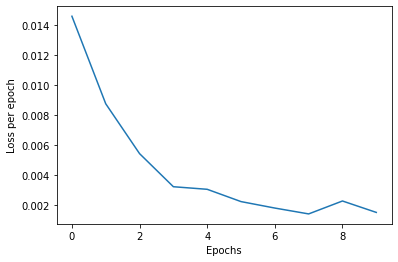

In [71]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)
plt.xlabel('Epochs')
plt.ylabel('Loss per epoch')

In [72]:
y_pred_scaled = model.predict(test_generator)
y_pred = Yscaler.inverse_transform(y_pred_scaled)
results = pd.DataFrame({'y_true1':test_df['PM2.5_pi'].values[n_input:],'y_pred':y_pred.ravel()})
print(results)

      y_true1     y_pred
0    6.790909   5.333722
1    3.716667   7.656267
2    6.259000   4.309421
3    6.294545   7.413560
4    3.974000   7.196590
..        ...        ...
98   4.403333   5.764727
99   6.740000   6.394857
100  3.617500   9.326946
101  8.692727   4.976125
102  9.065833  11.726709

[103 rows x 2 columns]


MSE:  5.4432958519597925
MAE:  1.9178496271548489


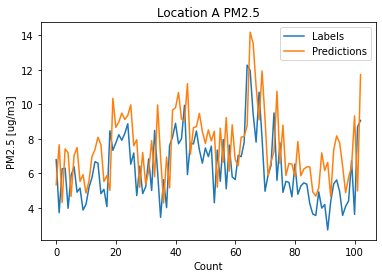

In [73]:
# without validation (80% training + 20 % test)
# dropout = 0.35
plt.plot(results, label = ['Labels', 'Predictions'])
plt.xlabel('Count')
plt.ylabel('PM2.5 [ug/m3]')
plt.legend()
plt.title('Location A PM2.5')
plt.savefig('C:/Users/ay0un/Desktop/ds-project/images/pm25_A.png')

# MSE, MAE
y_true1= test_df['PM2.5_pi'].values[n_input:]
y_pred1 = y_pred.ravel()

print("MSE: ", mean_squared_error(y_true1, y_pred1))
print("MAE: ", mean_absolute_error(y_true1, y_pred1))

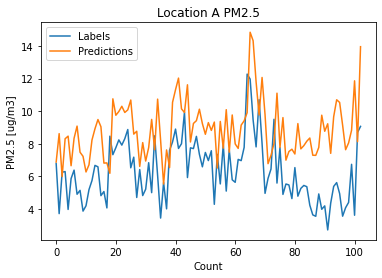

In [56]:
# without validation (80% training + 20 % test)
# dropout = 0.3
plt.plot(results, label = ['Labels', 'Predictions'])
plt.xlabel('Count')
plt.ylabel('PM2.5 [ug/m3]')
plt.legend()
plt.title('Location A PM2.5')
plt.savefig('C:/Users/ay0un/Desktop/ds-project/images/pm25_A.png')

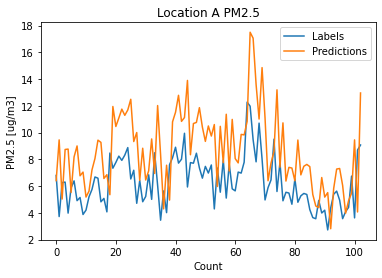

In [50]:
# without validation (80% training + 20 % test)
# dropout = 0.1
plt.plot(results, label = ['Labels', 'Predictions'])
plt.xlabel('Count')
plt.ylabel('PM2.5 [ug/m3]')
plt.legend()
plt.title('Location A PM2.5')
plt.savefig('C:/Users/ay0un/Desktop/ds-project/images/pm25_A.png')

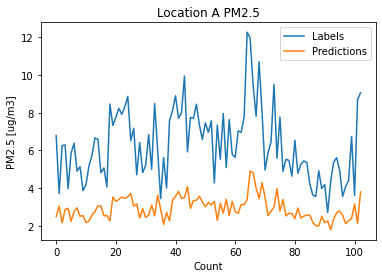

In [124]:

plt.plot(results, label = ['Labels', 'Predictions'])
plt.xlabel('Count')
plt.ylabel('PM2.5 [ug/m3]')
plt.legend()
plt.title('Location A PM2.5')
plt.savefig('C:/Users/ay0un/Desktop/ds-project/images/pm25_A.png')

In [131]:
results.mean(axis=0)

y_true1    6.310524
y_pred     2.927499
dtype: float64

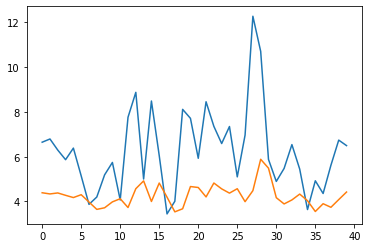

In [162]:
plt.plot(results)

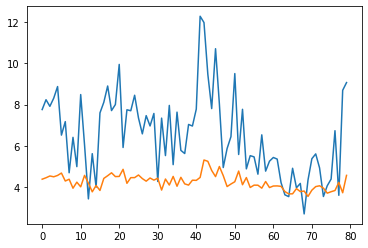

In [51]:
# 1h data again
plt.plot(results)

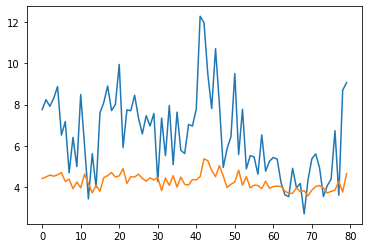

In [45]:
# 1h data
plt.plot(results)

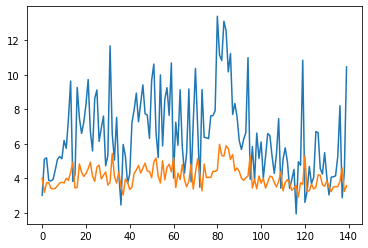

In [78]:
# 30 min data
plt.plot(results)

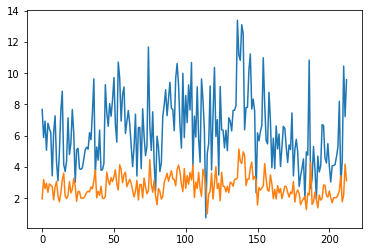

In [43]:
# 1h & w/o wind speed
plt.plot(results)

No validation

In [57]:
# dropout = 0.3
y_true1= test_df['PM2.5_pi'].values[n_input:]
y_pred1 = y_pred.ravel()

print("MSE: ", mean_squared_error(y_true1, y_pred1))
print("MAE: ", mean_absolute_error(y_true1, y_pred1))

MSE:  10.551102263432275
MAE:  2.7641547669057838


In [51]:
# dropout = 0.1
y_true1= test_df['PM2.5_pi'].values[n_input:]
y_pred1 = y_pred.ravel()

print("MSE: ", mean_squared_error(y_true1, y_pred1))
print("MAE: ", mean_absolute_error(y_true1, y_pred1))

MSE:  11.720817677750835
MAE:  2.7994530417363857


New dataset result


In [113]:
# only-pi data
# 256/ 6 time / 1 batch
y_true1= test_df['PM2.5_pi'].values[n_input:]
y_pred1 = y_pred.ravel()

print("MSE: ", mean_squared_error(y_true1, y_pred1))
print("MAE: ", mean_absolute_error(y_true1, y_pred1))

MSE:  14.184751207982302
MAE:  3.383025690408317


In [46]:
# LSTM 256 / epochs = 30 (default)
# Time steps = 4 / Batch size = 2
# Including PM from X
y_true1= test_df['PM2.5_pi'].values[n_input:]
y_pred1 = y_pred.ravel()

print("MSE: ", mean_squared_error(y_true1, y_pred1))
print("MAE: ", mean_absolute_error(y_true1, y_pred1))

MSE:  8.342905364000874
MAE:  2.3376780752268016


In [79]:
# 30min data
# LSTM 256 / epochs = 30 (default)
# Time steps = 4 / Batch size = 2
# Including PM from X
y_true1= test_df['PM2.5_pi'].values[n_input:]
y_pred1 = y_pred.ravel()

print("MSE: ", mean_squared_error(y_true1, y_pred1))
print("MAE: ", mean_absolute_error(y_true1, y_pred1))

MSE:  10.663432630764106
MAE:  2.599989678260258


Old dataset result

In [163]:
# LSTM 256 / epochs = 30 (default)
# Time steps = 4 / Batch size = 2
# Including PM from X
y_true1= test_df['PM2.5_pi'].values[n_input:]
y_pred1 = y_pred.ravel()

print("MSE: ", mean_squared_error(y_true1, y_pred1))
print("MAE: ", mean_absolute_error(y_true1, y_pred1))

MSE:  6.860517574722159
MAE:  2.0588333099267526


In [80]:
# LSTM 256 / epochs = 30 (default)
# Time steps = 3 / Batch size = 2
# Excluding PM from X
y_true1= test_df['PM2.5_pi'].values[n_input:]
y_pred1 = y_pred.ravel()

print("MSE: ", mean_squared_error(y_true1, y_pred1))
print("MAE: ", mean_absolute_error(y_true1, y_pred1))

MSE:  7.295556859505828
MAE:  2.1365272526493686


In [112]:
# LSTM 256 / epochs = 30 (default)
# Time steps = 3 / Batch size = 2
# Excluding PM from X
y_true1= test_df['PM2.5_pi'].values[n_input:]
y_pred1 = y_pred.ravel()

print("MSE: ", mean_squared_error(y_true1, y_pred1))
print("MAE: ", mean_absolute_error(y_true1, y_pred1))

MSE:  5.922937619494131
MAE:  1.9006601848464677


In [131]:
# LSTM 256 / epochs = 30 (default)
# Time steps = 3 / Batch size = 2
# Including PM from X
y_true1= test_df['PM2.5_pi'].values[n_input:]
y_pred1 = y_pred.ravel()

print("MSE: ", mean_squared_error(y_true1, y_pred1))
print("MAE: ", mean_absolute_error(y_true1, y_pred1))

MSE:  7.047717796611782
MAE:  2.1085981806683
